In [1]:
# Uncomment and install all the libraries if required
# ! pip install rdkit-pypi pandas seaborn mols2grid

In [2]:
# Import libraries required
# RDKit Chemistry
from rdkit import Chem
# RDKit drawing
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
# RDKit fingerprint generator
from rdkit.Chem import rdFingerprintGenerator
# RDKit functionality for basic data structures
from rdkit.Chem import DataStructs
# Settings to improve quality of structures
from rdkit.Chem import rdDepictor
# SVG = scalable vector graphics, set to false if wanting PNGs instead
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
# Add ability to add a molecule to a dataframe
from rdkit.Chem import PandasTools
# mols2grid library provides a convenient way to display molecules in a grid
import mols2grid
import pandas as pd
import matplotlib.pyplot as plt

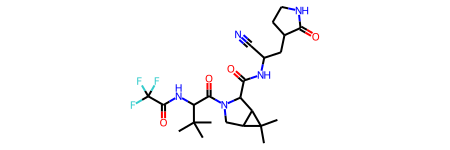

In [3]:
# One of the most well-known COVID-19 oral antivirals was Paxlovid
# which is consisted of two antivirals: nirmatrelvir and ritonavir
# Use the canonical SMILES for nirmatrelvir from PubChem
# Generate a RDKit molecule representing nirmatrelvir
nmt = Chem.MolFromSmiles("CC1(C2C1C(N(C2)C(=O)C(C(C)(C)C)NC(=O)C(F)(F)F)C(=O)NC(CC3CCNC3=O)C#N)C")
nmt

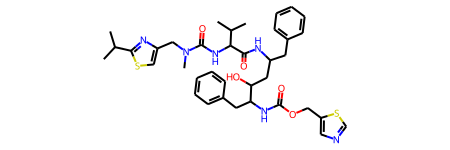

In [4]:
# Let us also create a RDKit molecule for ritonavir using canonical SMILES
rit = Chem.MolFromSmiles("CC(C)C1=NC(=CS1)CN(C)C(=O)NC(C(C)C)C(=O)NC(CC2=CC=CC=C2)CC(C(CC3=CC=CC=C3)NC(=O)OCC4=CN=CS4)O")
rit

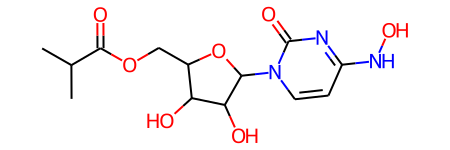

In [5]:
# Create a RDKit molecule for molnupiravir using canonical SMILES
mol = Chem.MolFromSmiles("CC(C)C(=O)OCC1C(C(C(O1)N2C=CC(=NC2=O)NO)O)O")
mol

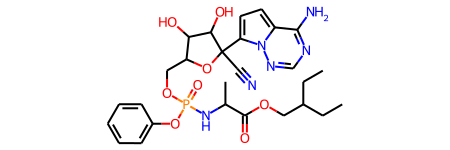

In [6]:
rem = Chem.MolFromSmiles("CCC(CC)COC(=O)C(C)NP(=O)(OCC1C(C(C(O1)(C#N)C2=CC=C3N2N=CN=C3N)O)O)OC4=CC=CC=C4")
rem

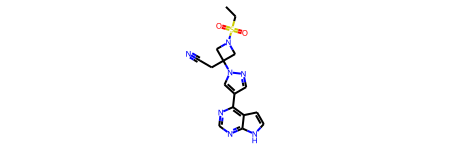

In [7]:
bar = Chem.MolFromSmiles("CCS(=O)(=O)N1CC(C1)(CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3")
bar

In [8]:
# Saved all .sdf files for 5 COVID-19 antivirals into one .sdf file as covid_antivirals.sdf
# To do this, one way is via the terminal with a line of code as "cat *.sdf > file_name.sdf"
# Note: change the directory to the path where all .sdf files are saved
cpds = [x for x in Chem.SDMolSupplier("covid_antivirals.sdf")]
cpds

In [9]:
# Display all compounds in a flexible grid view with selection function
mols2grid.display(cpds)

MolGridWidget()

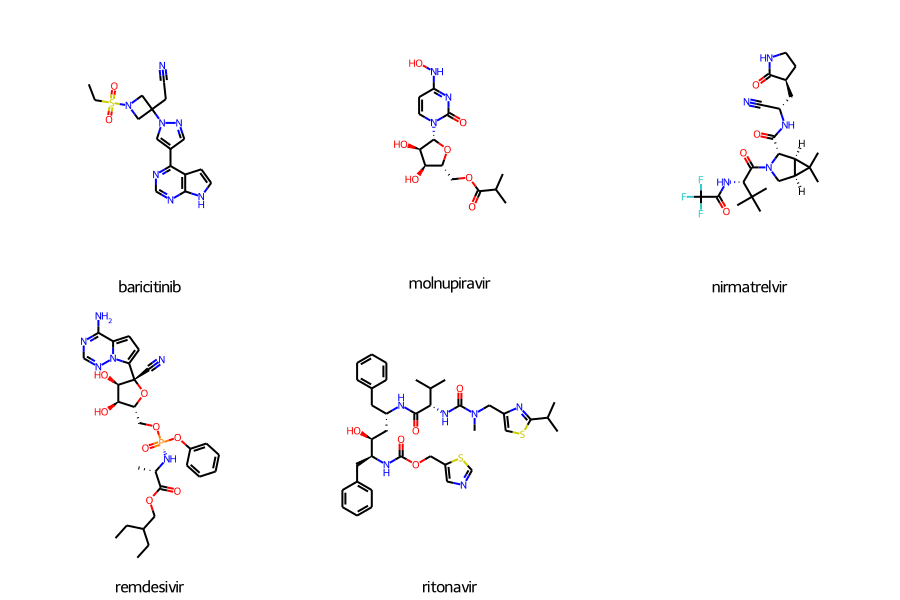

In [10]:
# Display compounds in grid view with drug names shown
Draw.MolsToGridImage(cpds, 
                     molsPerRow = 3, 
                     legends = ("baricitinib", "molnupiravir", "nirmatrelvir", "remdesivir", "ritonavir"), 
                     subImgSize=(300, 300), 
                     useSVG = True
                    )

In [11]:
# Build similarity maps between molecules
# Import additional libraries needed
from rdkit.Chem.Draw import SimilarityMaps
import io
from PIL import Image

In [12]:
# Binary i/o keeps data as bytes in an in-memory buffer
# A function that creates a bytes object as an image
def show_png(data):
    bio = io.BytesIO(data)
    img = Image.open(bio)
    return img

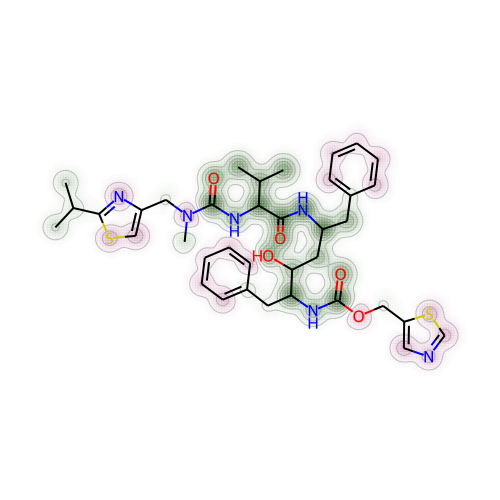

In [13]:
# 1. Trial comparing nirmatrelvir with ritonavir
# Create a Draw2D object "a" and specify size of 2D image
a = Draw.MolDraw2DCairo(500, 500)
# Produces a similarity map for nirmatrelvir and ritonavir
# Specify which compounds to compare (reference and probe) for the similarity map
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(nmt, rit, 
                                                               # creates a lambda function (anonymous function) for use within SimilarityMaps, 
                                                               # then select fingerprint type e.g. Morgan fingerprint
                                                               # types of Morgan fingerprint: bit vector (bv, default) & count vector (count)
                                                               lambda b, c: SimilarityMaps.GetMorganFingerprint(b, c, radius = 2, fpType = 'bv'),
                                                               draw2d = a)

# Finish drawing Draw2D object "a"                                                                                       
a.FinishDrawing()
# Display similarity map                                                             
show_png(a.GetDrawingText())

In [14]:
# Max weight between nirmatrelvir and ritonavir 
print(maxweight)
# This is the maximum weight or maximum difference calculated based on the 
# similarities between the reference molecule (nirmatrelvir) and test molecule (ritonavir)

0.03389096421417358


In [15]:
mol2_rit_maxw_mol1 = maxweight
mol2_rit_maxw_mol1

0.03389096421417358

In [16]:
# In more details, the atomic weights were calculated based on the ref mol & test mol
# Procedure (styled as pseudocodes in Python which were directly quoted from the paper*) summaried as below:
# 1. Calculate the fingerprint for ref mol
# ref_fp = calculate_fingerprint (ref_mol)
# 2. Calculate the fingerprint for test mol
# this_fp = calculate_fingerprint (this_mol)
# 3. Create an empty weights list
# weights = []
# 4. Calculate original similarity for ref mol & test mol based on Dice similarity
# orig_simil = dice_similarity(ref_fp, this_fp)
# 5. Loop over the different atoms present in the test mol
# for atom in this_mol.get_atoms:
# 5. (cont.) Generate a new fingerprint by calculating new fingerprints without each of the atoms for the test mol
#    new_fp = calculate_fingerprint_without_atom(this_mol, atom)
# 5. (cont.) Calculate new similarity for the ref fingerprint & new fingerprint based on Dice similarity
# new_simil = dice_similarity(ref_fp, new_fp)
# 6. The atomic weight will be calculated as the difference between the original similarity and the new similarity
# weight = original_simil - new_simil
# 7. The atomic weight obtained for each loop iteration (each atom present) will be added up -> atomic weight
# weights.append(weight)
# note: maximum absolute weight is normalised and capped at 1.0
# * Riniker, S. and Landrum, GA. Similarity maps - a visualization strategy for molecular fingerprints and machine-learning methods. J. Cheminf. 2013, 5: 43.

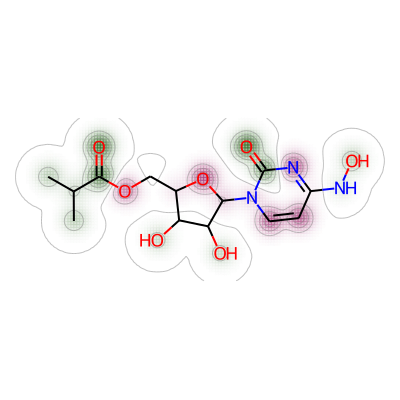

In [17]:
# 2. Comparing nirmatrelvir and molnupiravir
a = Draw.MolDraw2DCairo(400, 400)
# Produces a similarity map for molecules selected
# Specify which compounds to compare (reference and probe) for the similarity map
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(nmt, mol, 
                                                               # creates a lambda function (anonymous function) for use within SimilarityMaps, 
                                                               # then select fingerprint type e.g. Morgan fingerprint
                                                               # types of Morgan fingerprint: bit vector (bv, default) & count vector (count)
                                                               lambda b, c: SimilarityMaps.GetMorganFingerprint(b, c, radius = 2, fpType = 'bv'),
                                                               draw2d = a)

# Finish drawing Draw2D object "a"                                                                                       
a.FinishDrawing()
# Display similarity map                                                             
show_png(a.GetDrawingText())

In [18]:
print(maxweight)

0.026617250673854453


In [19]:
mol3_mol_maxw_mol1 = maxweight
mol3_mol_maxw_mol1

0.026617250673854453

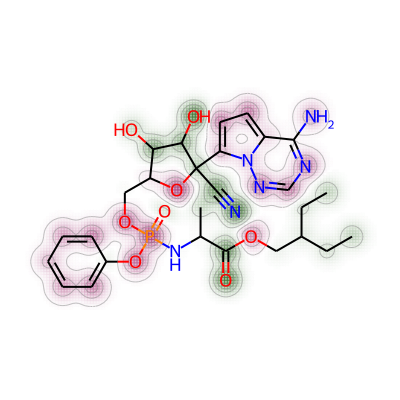

In [20]:
# 3. Comparing nirmatrelvir and remdesivir
a = Draw.MolDraw2DCairo(400, 400)
# Produces a similarity map for molecules selected
# Specify which compounds to compare (reference and probe) for the similarity map
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(nmt, rem, 
                                                               # creates a lambda function (anonymous function) for use within SimilarityMaps, 
                                                               # then select fingerprint type e.g. Morgan fingerprint
                                                               # types of Morgan fingerprint: bit vector (bv, default) & count vector (count)
                                                               lambda b, c: SimilarityMaps.GetMorganFingerprint(b, c, radius = 2, fpType = 'bv'),
                                                               draw2d = a)

# Finish drawing Draw2D object "a"                                                                                       
a.FinishDrawing()
# Display similarity map                                                             
show_png(a.GetDrawingText())

In [21]:
print(maxweight)

0.021674876847290636


In [22]:
mol4_rem_maxw_mol1 = maxweight
mol4_rem_maxw_mol1

0.021674876847290636

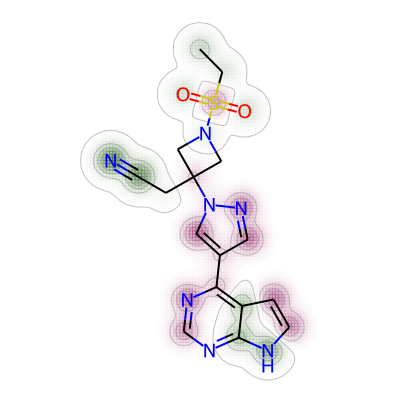

In [23]:
# 4. Comparing nirmatrelvir and baricitinib
a = Draw.MolDraw2DCairo(400, 400)
# Produces a similarity map for molecules selected
# Specify which compounds to compare (reference and probe) for the similarity map
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(nmt, bar, 
                                                               # creates a lambda function (anonymous function) for use within SimilarityMaps, 
                                                               # then select fingerprint type e.g. Morgan fingerprint
                                                               # types of Morgan fingerprint: bit vector (bv, default) & count vector (count)
                                                               lambda b, c: SimilarityMaps.GetMorganFingerprint(b, c, radius = 2, fpType = 'bv'),
                                                               draw2d = a)

# Finish drawing Draw2D object "a"                                                                                       
a.FinishDrawing()
# Display similarity map                                                             
show_png(a.GetDrawingText())

In [24]:
print(maxweight)

0.026242075777679508


In [25]:
mol5_bar_maxw_mol1 = maxweight
mol5_bar_maxw_mol1

0.026242075777679508

In [26]:
# Short summary:
# nirmatrelvir vs. remdesivir has the smallest max weight or smallest maximum difference out of all compounds.
# nirmatrelvir vs. ritonavir has the biggest max weight or max difference out of all compounds, the next
# biggest one would be molnupiravir

In [27]:
# Re-label molecules
mol1 = nmt
mol2 = rit
mol3 = mol
mol4 = rem
mol5 = bar

In [28]:
# Combine all 5 molecules into a list
mols = [mol1, mol2, mol3, mol4, mol5]

In [29]:
# Create an object fp to generate fingerprint, default radius of molecule = 3 (changed to 2)
fp = rdFingerprintGenerator.GetMorganGenerator(radius = 2)
# Get fingerprints of all molecules in the list
fp1 = [fp.GetFingerprint(x) for x in mols]
fp1

In [30]:
# Create a loop to iterate through all 5 COVID antivirals 
# to compare the molecular similarities by using Tanimoto coefficient
for i in range(len(fp1)):
    for a in range(i):
        tc = DataStructs.TanimotoSimilarity(fp1[i], fp1[a])
        print(f'mol{i+1}-mol{a+1}: Tanimoto coefficient {tc}')

mol2-mol1: Tanimoto coefficient 0.08461538461538462
mol3-mol1: Tanimoto coefficient 0.10891089108910891
mol3-mol2: Tanimoto coefficient 0.14953271028037382
mol4-mol1: Tanimoto coefficient 0.10687022900763359
mol4-mol2: Tanimoto coefficient 0.1386861313868613
mol4-mol3: Tanimoto coefficient 0.19811320754716982
mol5-mol1: Tanimoto coefficient 0.11214953271028037
mol5-mol2: Tanimoto coefficient 0.09243697478991597
mol5-mol3: Tanimoto coefficient 0.10989010989010989
mol5-mol4: Tanimoto coefficient 0.15517241379310345


In [31]:
# Tanimoto coefficient between nirmatrelvir (mol1) & ritonavir (mol2)
tc_mol1_mol2 = DataStructs.TanimotoSimilarity(fp1[0], fp1[1])

# Tanimoto coefficient between nirmatrelvir (mol1) & molnupiravir (mol3)
tc_mol1_mol3 = DataStructs.TanimotoSimilarity(fp1[0], fp1[2])

# Tanimoto coefficient between nirmatrelvir (mol1) & remdesivir (mol4)
tc_mol1_mol4 = DataStructs.TanimotoSimilarity(fp1[0], fp1[3])

# Tanimoto coefficient between nirmatrelvir (mol1) & baricitinib (mol5)
tc_mol1_mol5 = DataStructs.TanimotoSimilarity(fp1[0], fp1[4])

In [32]:
tc_mols = [tc_mol1_mol2, tc_mol1_mol3, tc_mol1_mol4, tc_mol1_mol5]
tc_mols

[0.08461538461538462,
 0.10891089108910891,
 0.10687022900763359,
 0.11214953271028037]

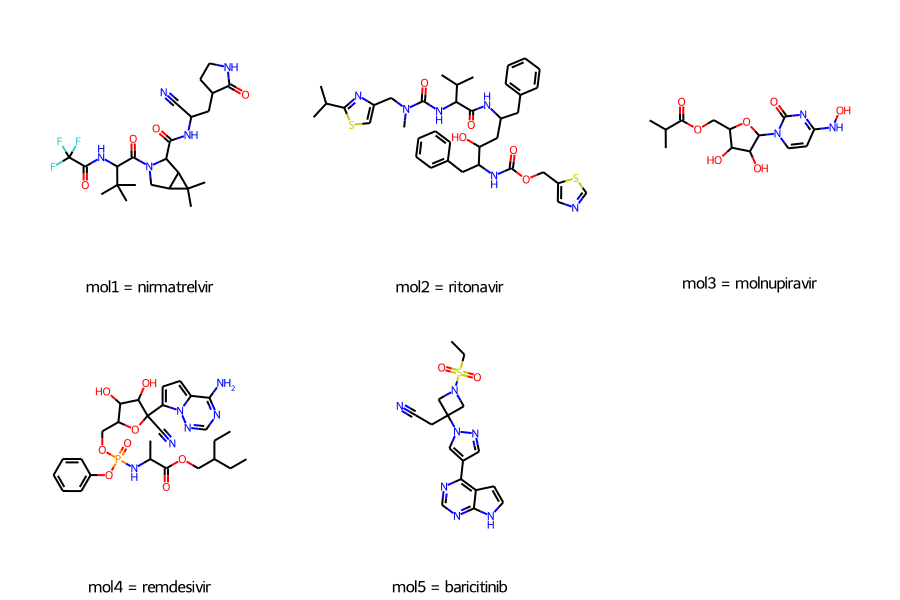

In [33]:
# Display compounds to help with recognising which antivirals are being compared
Draw.MolsToGridImage(mols, 
                     molsPerRow = 3, 
                     legends = ("mol1 = nirmatrelvir", "mol2 = ritonavir", "mol3 = molnupiravir", "mol4 = remdesivir", "mol5 = baricitinib"), 
                     subImgSize=(300, 300), 
                     useSVG = True
                    )

In [34]:
maxw_diff = [mol2_rit_maxw_mol1, mol3_mol_maxw_mol1, mol4_rem_maxw_mol1, mol5_bar_maxw_mol1]
maxw_diff

[0.03389096421417358,
 0.026617250673854453,
 0.021674876847290636,
 0.026242075777679508]

In [35]:
df_ms = pd.DataFrame(list(zip(maxw_diff, tc_mols)),
                     index = ['nmt_v_rit', 'nmt_v_mol', 'nmt_v_rem', 'nmt_v_bar'],
                     columns = ['Maxweight', 'T_coeff']
                    )
df_ms

,Maxweight,T_coeff
nmt_v_rit,0.033891,0.084615
nmt_v_mol,0.026617,0.108911
nmt_v_rem,0.021675,0.106870
nmt_v_bar,0.026242,0.112150


In [36]:
df_ms.reset_index(inplace = True)
df_ms_new = df_ms.rename(columns = {'index': 'Molecules'})
df_ms_new

,Molecules,Maxweight,T_coeff
0,nmt_v_rit,0.033891,0.084615
1,nmt_v_mol,0.026617,0.108911
2,nmt_v_rem,0.021675,0.106870
3,nmt_v_bar,0.026242,0.112150


Text(4.5, 0, 'nmt = nirmatrelvir, rit = ritonavir, mol = molnupiravir,\nrem = remdesivir, bar = baricitinib')

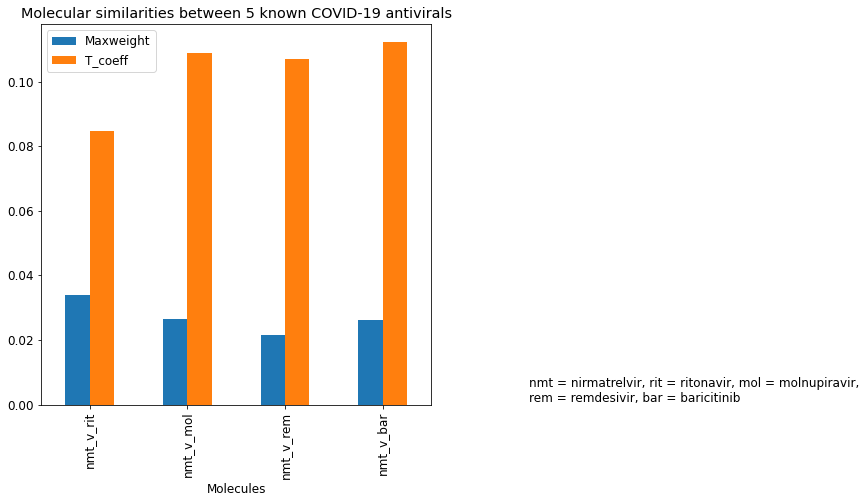

In [37]:
# Set the overall font size to make all labels on graph easier to read
plt.rcParams.update({'font.size': 12})
# Plot a bar graph showing two different molecular similarity parameters 
# Maximum weight from similarity map & Tanimoto coefficient calculated based on Morgan fingerprints 
# Used on 5 known FDA-approved COVID-19 antivirals
# Used nirmatrelvir as reference compound (mol1) and compared it with 4 other antivirals
df_ms_new.plot(x = 'Molecules', y = ['Maxweight', 'T_coeff'], kind = 'bar', figsize = (7, 7))
# Add title
plt.title(label = 'Molecular similarities between 5 known COVID-19 antivirals')


# Add caption for the graph about the abbreviations of all the molecules compared 
# Import textwrap module
import textwrap
t = "nmt = nirmatrelvir, "\
    "rit = ritonavir, "\
    "mol = molnupiravir, "\
    "rem = remdesivir, "\
    "bar = baricitinib"
b = textwrap.fill(t, width = 58)
x = 'Molecules'
y = ['Maxweight', 'T_coeff']
plt.text(len(x) / 2, 0, b, ha = 'left', va = 'bottom')